In [23]:
import os
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import warnings

warnings.filterwarnings("ignore")

In [24]:
train_audio_path = './input/tensorflow-speech-recognition-challenge/train/audio/'
samples, sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav', sr = 16000)
samples = librosa.resample(samples, sample_rate, 8000)

In [25]:
labels=[ "up", "down", "left", "right", "stop"]

In [26]:
train_audio_path = './input/tensorflow-speech-recognition-challenge/train/audio/'

all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

up
down
left
right
stop


In [27]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)
y=np_utils.to_categorical(y, num_classes=len(labels))

In [32]:
from sklearn.model_selection import train_test_split

all_wave = np.array(all_wave).reshape(-1,8000,1)
x_trs=[]
y_trs=[]
trsNumOfElems=[]
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)
for i in np.arange(0,3,0.5):    
    x_trs.append(x_tr[0:int(len(x_tr)/(i+1))])
    y_trs.append(y_tr[0:int(len(y_tr)/(i+1))])
    trsNumOfElems.append(int(len(x_tr)/(i+1)))
print(trsNumOfElems)

[8566, 5710, 4283, 3426, 2855, 2447]


In [33]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
def getModel():
    K.clear_session()

    inputs = Input(shape=(8000,1))

    #First Conv1D layer
    conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
    conv = MaxPooling1D(3)(conv)
    conv = Dropout(0.3)(conv)

    #Second Conv1D layer
    conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
    conv = MaxPooling1D(3)(conv)
    conv = Dropout(0.3)(conv)

    #Third Conv1D layer
    conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
    conv = MaxPooling1D(3)(conv)
    conv = Dropout(0.3)(conv)

    #Fourth Conv1D layer
    conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
    conv = MaxPooling1D(3)(conv)
    conv = Dropout(0.3)(conv)

    #Flatten layer
    conv = Flatten()(conv)

    #Dense Layer 1
    conv = Dense(256, activation='relu')(conv)
    conv = Dropout(0.3)(conv)

    #Dense Layer 2
    conv = Dense(128, activation='relu')(conv)
    conv = Dropout(0.3)(conv)

    outputs = Dense(len(labels), activation='softmax')(conv)

    model = Model(inputs, outputs)
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
    return model

In [34]:
def predictLabel(audio,model):
    prob=model.predict(audio.reshape(-1,8000,1))
    return np.argmax(prob[0])

Training set size:  8566
Train on 8566 samples, validate on 2142 samples
Epoch 1/3
8566/8566 [==============================] - 80s 9ms/step - loss: 1.4725 - acc: 0.3374 - val_loss: 1.2227 - val_acc: 0.4883

Epoch 00001: val_acc improved from -inf to 0.48833, saving model to best_model.hdf5
Epoch 2/3
8566/8566 [==============================] - 77s 9ms/step - loss: 1.0749 - acc: 0.5702 - val_loss: 0.8669 - val_acc: 0.6667

Epoch 00002: val_acc improved from 0.48833 to 0.66667, saving model to best_model.hdf5
Epoch 3/3
8566/8566 [==============================] - 71s 8ms/step - loss: 0.8593 - acc: 0.6634 - val_loss: 0.7854 - val_acc: 0.7120

Epoch 00003: val_acc improved from 0.66667 to 0.71195, saving model to best_model.hdf5


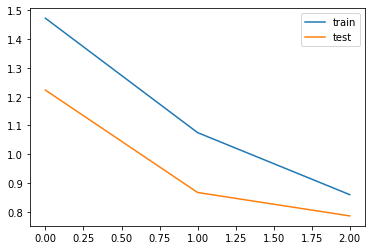

[[293  39  64  25  10]
 [  5 398   7  14   9]
 [ 25  62 327  12   5]
 [ 27  59  15 258  76]
 [ 17  20  14 112 249]]
              precision    recall  f1-score   support

           0       0.80      0.68      0.73       431
           1       0.69      0.92      0.79       433
           2       0.77      0.76      0.76       431
           3       0.61      0.59      0.60       435
           4       0.71      0.60      0.65       412

    accuracy                           0.71      2142
   macro avg       0.72      0.71      0.71      2142
weighted avg       0.72      0.71      0.71      2142

Training set size:  5710
Train on 5710 samples, validate on 2142 samples
Epoch 1/3
5710/5710 [==============================] - 53s 9ms/step - loss: 1.5337 - acc: 0.2946 - val_loss: 1.4683 - val_acc: 0.3371

Epoch 00001: val_acc improved from -inf to 0.33707, saving model to best_model.hdf5
Epoch 2/3
5710/5710 [==============================] - 52s 9ms/step - loss: 1.2689 - acc: 0.4613 - val_

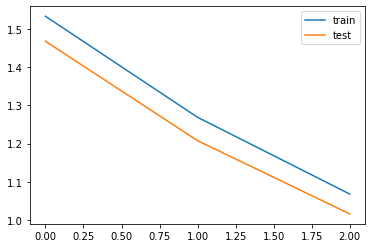

[[280  17  42  31  61]
 [ 11 340   8  47  27]
 [ 70  80 193  51  37]
 [ 25  10   4 146 250]
 [ 13   9   6  43 341]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       431
           1       0.75      0.79      0.76       433
           2       0.76      0.45      0.56       431
           3       0.46      0.34      0.39       435
           4       0.48      0.83      0.60       412

    accuracy                           0.61      2142
   macro avg       0.63      0.61      0.60      2142
weighted avg       0.63      0.61      0.60      2142

Training set size:  4283
Train on 4283 samples, validate on 2142 samples
Epoch 1/3
4283/4283 [==============================] - 35s 8ms/step - loss: 1.5735 - acc: 0.2650 - val_loss: 1.4997 - val_acc: 0.3604

Epoch 00001: val_acc improved from -inf to 0.36041, saving model to best_model.hdf5
Epoch 2/3
4283/4283 [==============================] - 39s 9ms/step - loss: 1.3642 - acc: 0.4084 - val_

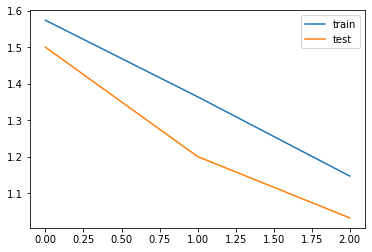

[[259  13  69  33  57]
 [  6 308  32  38  49]
 [ 63  70 224  29  45]
 [ 15  27   8 146 239]
 [  6   7  10  36 353]]
              precision    recall  f1-score   support

           0       0.74      0.60      0.66       431
           1       0.72      0.71      0.72       433
           2       0.65      0.52      0.58       431
           3       0.52      0.34      0.41       435
           4       0.48      0.86      0.61       412

    accuracy                           0.60      2142
   macro avg       0.62      0.60      0.60      2142
weighted avg       0.62      0.60      0.60      2142

Training set size:  3426
Train on 3426 samples, validate on 2142 samples
Epoch 1/3
3426/3426 [==============================] - 30s 9ms/step - loss: 1.5700 - acc: 0.2831 - val_loss: 1.5375 - val_acc: 0.2899

Epoch 00001: val_acc improved from -inf to 0.28992, saving model to best_model.hdf5
Epoch 2/3
3426/3426 [==============================] - 33s 10ms/step - loss: 1.3724 - acc: 0.4025 - val

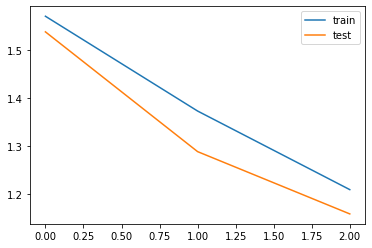

[[182  39 127  44  39]
 [  9 312  25  62  25]
 [ 44 119 188  48  32]
 [ 10  56  14 274  81]
 [  8  37   5 159 203]]
              precision    recall  f1-score   support

           0       0.72      0.42      0.53       431
           1       0.55      0.72      0.63       433
           2       0.52      0.44      0.48       431
           3       0.47      0.63      0.54       435
           4       0.53      0.49      0.51       412

    accuracy                           0.54      2142
   macro avg       0.56      0.54      0.54      2142
weighted avg       0.56      0.54      0.54      2142

Training set size:  2855
Train on 2855 samples, validate on 2142 samples
Epoch 1/3
2855/2855 [==============================] - 29s 10ms/step - loss: 1.5908 - acc: 0.2455 - val_loss: 1.5699 - val_acc: 0.2507

Epoch 00001: val_acc improved from -inf to 0.25070, saving model to best_model.hdf5
Epoch 2/3
2855/2855 [==============================] - 26s 9ms/step - loss: 1.4198 - acc: 0.3776 - val

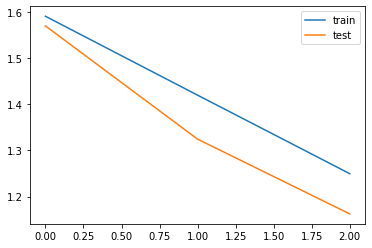

[[255  29  62  48  37]
 [ 13 286  32  74  28]
 [ 93  90 171  46  31]
 [ 39  29  16 233 118]
 [ 19  18   6 162 207]]
              precision    recall  f1-score   support

           0       0.61      0.59      0.60       431
           1       0.63      0.66      0.65       433
           2       0.60      0.40      0.48       431
           3       0.41      0.54      0.47       435
           4       0.49      0.50      0.50       412

    accuracy                           0.54      2142
   macro avg       0.55      0.54      0.54      2142
weighted avg       0.55      0.54      0.54      2142

Training set size:  2447
Train on 2447 samples, validate on 2142 samples
Epoch 1/3
2447/2447 [==============================] - 24s 10ms/step - loss: 1.5937 - acc: 0.2501 - val_loss: 1.5893 - val_acc: 0.2554

Epoch 00001: val_acc improved from -inf to 0.25537, saving model to best_model.hdf5
Epoch 2/3
2447/2447 [==============================] - 24s 10ms/step - loss: 1.4743 - acc: 0.3445 - va

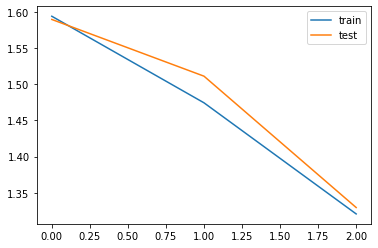

[[148  42  92  83  66]
 [  9 190  69  69  96]
 [ 55 100 138  70  68]
 [ 15  29   9  98 284]
 [  7  13   5  45 342]]
              precision    recall  f1-score   support

           0       0.63      0.34      0.45       431
           1       0.51      0.44      0.47       433
           2       0.44      0.32      0.37       431
           3       0.27      0.23      0.25       435
           4       0.40      0.83      0.54       412

    accuracy                           0.43      2142
   macro avg       0.45      0.43      0.41      2142
weighted avg       0.45      0.43      0.41      2142



In [35]:
from matplotlib import pyplot
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
    
y_val2=[np.argmax(y) for y in y_val]
accuracyScores=[]
for i in range(len(x_trs)):
    predicted=[]
    print("Training set size: ",len(x_trs[i]))
    model=getModel()
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
    mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    history=model.fit(np.array(x_trs[i]), np.array(y_trs[i]) ,epochs=3, callbacks=[es,mc], batch_size=32, validation_data=(np.array(x_val),np.array(y_val)))
    
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='test')
    pyplot.legend()
    pyplot.show()
    
    model=load_model('best_model.hdf5')
    predicted=[predictLabel(x,model) for x in x_val]

    cm = confusion_matrix(y_val2, predicted)
    print(cm)
    print(classification_report(y_val2, predicted))
    accuracyScores.append(accuracy_score(y_val2, predicted))

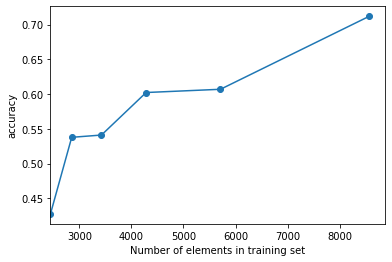

In [37]:
plt.plot(trsNumOfElems,accuracyScores,'-o')
plt.xlim(left=trsNumOfElems[len(trsNumOfElems)-1])
plt.xlabel("Number of elements in training set")
plt.ylabel("accuracy")
plt.show()